<a href="https://colab.research.google.com/github/Shubham-M-Rathod/ML_algos_from_scratch/blob/main/ML_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression

In [ ]:
x = np.random.randint(1, 100, size=30)
y = np.random.randint(1,3, size=30)*x+np.random.randint(1,10, size=30)

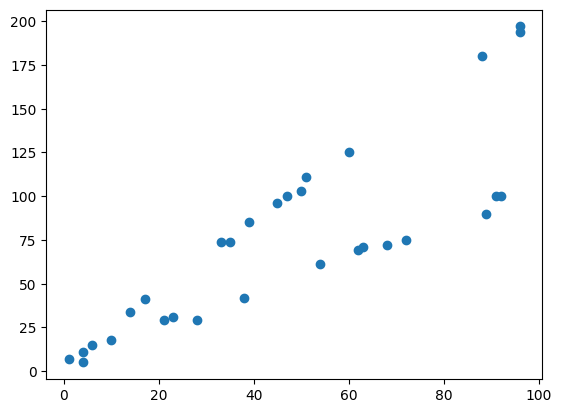

In [ ]:
plt.scatter(x,y)
plt.show()

## Gradient Descent

In [ ]:
w = [0]
b = [0]
epochs=20
r=10e-6
for i in range(epochs):
  w_new = w[-1] - r*2*(-x*(y-w[-1]*x+b[-1])).sum()
  b_new = b[-1] - r*2*(y-w[-1]*x+b[-1]).sum()
  w.append(w_new)
  b.append(b_new)

In [ ]:
# for stochastic - replace x with random k points
# and their corresponding y

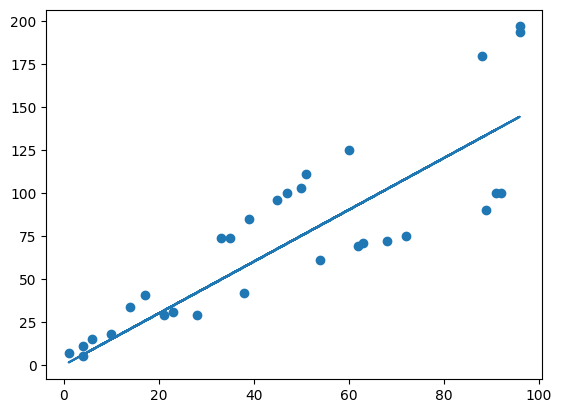

In [ ]:
plt.scatter(x, y)
plt.plot(x, w[-1]*x+b[-1])
plt.show()

## Normal Equation

In [ ]:
x_w=np.column_stack((x, np.ones(30)))
best_w = np.linalg.inv(x_w.T.dot(x_w)).dot(x_w.T).dot(y)

In [ ]:
w, b = best_w

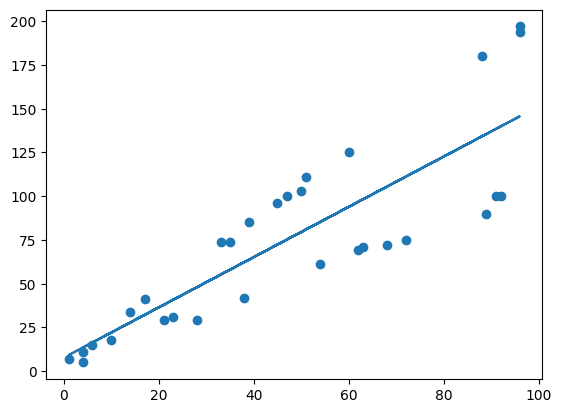

In [ ]:
plt.scatter(x, y)
plt.plot(x, w*x+b)
plt.show()

# Logistic Regression

In [ ]:
x = np.random.rand(30)
x.sort()
y = np.random.rand(30)
y.sort()

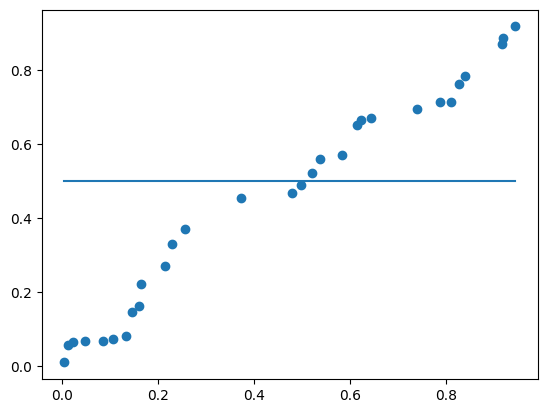

In [ ]:
plt.scatter(x,y)
plt.plot(x, [0.5]*30)
plt.show()

In [ ]:
y_transformed = [-np.log(1/z - 1) for z in y]
y_target = [0 if z<0.5 else 1 for z in y]

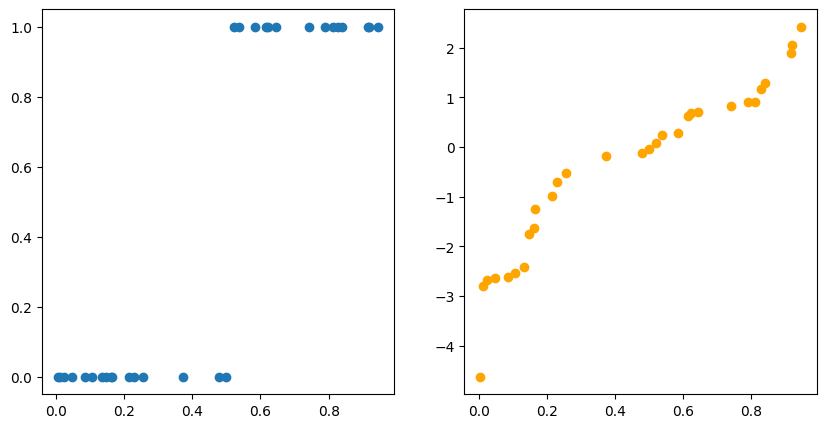

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(x, y_target)
axes[1].scatter(x, y_transformed, color='orange')
plt.show()

### Logistic - Normal Equation - Given Probabilities

In [ ]:
x_w=np.column_stack((x, np.ones(30)))
best_w = np.linalg.inv(x_w.T.dot(x_w)).dot(x_w.T).dot(y_transformed)
w, b = best_w

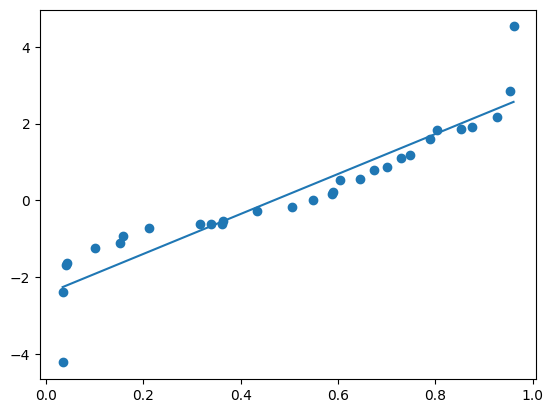

In [ ]:
plt.scatter(x, y_transformed)
plt.plot(x, w*x+b)
plt.show()

In [ ]:
y_pred = [1/(1+np.exp(-z)) for z in w*x+b]

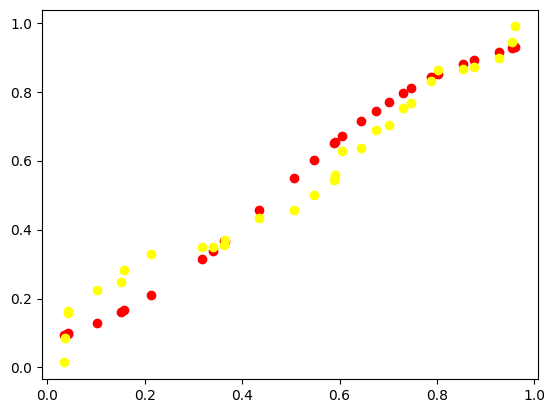

In [ ]:
plt.scatter(x, y_pred, color='red')
plt.scatter(x, y, color='yellow')
plt.show()

## Logistic - Gradient Descent

In [ ]:
epochs=90
w = [0]
b = [0]
r=10e-6
for id in range(epochs):
    z = w[-1]*x+b[-1]
    pred = 1/(1+np.exp(-z))
    de = (pred-y_target)
    w_new = w[-1] - r*(x*de).sum()
    b_new = b[-1] - r*(de).sum()

    w.append(w_new)
    b.append(b_new)

In [ ]:
z = w[-1]*x+b[-1]
pred = 1/(1+np.exp(-z))

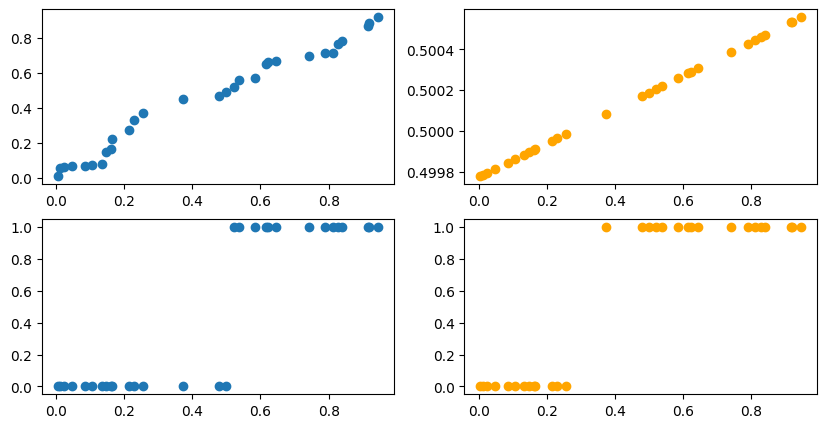

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes[0,0].scatter(x, y)
axes[0,1].scatter(x, pred, color='orange')
axes[1,0].scatter(x, y_target)
axes[1,1].scatter(x, [0 if z<0.5 else 1 for z in pred], color='orange')
plt.show()

# Recurrent Neural Network
### improve karne ke chakkar me aur wrong ho gaya - commented out wala derivative hai

In [ ]:
x = np.arange(-10,11)
x_i = np.random.randint(0,5)*np.sin(x)+np.random.rand()

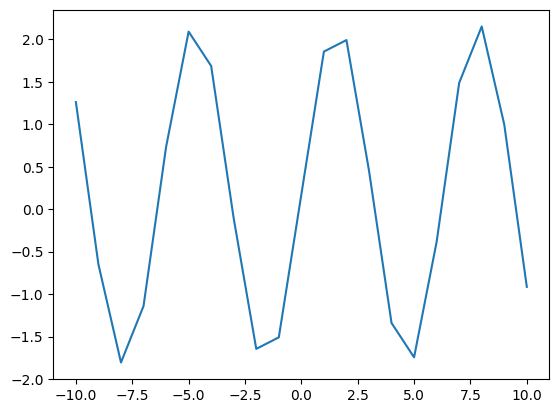

In [ ]:
plt.plot(x, x_i)
plt.show()

## Randomisation of Weights

In [ ]:
Wih = np.random.rand(3, 4)
Whh = np.random.rand(3, 3)
Who = np.random.rand(1, 3)

In [ ]:
b1 = np.random.rand(3)
b2 = np.random.rand()

In [ ]:
x_prev = []
x_prev.append(np.zeros(3))

In [ ]:
# ip=np.array((3,4,5,6)) # dummy
# i_h = np.tanh(np.dot(Wih, ip) + np.dot(Whh, x_prev[-1]) + b1)
# h_o = np.dot(Who, i_h)+b2

In [ ]:
train = []
for i in range(len(x_i)-4):
  train.append([x_i[i:i+4], x_i[i+4]])

In [ ]:
loss=0
i_h = np.tanh(np.dot(Wih, train[0][0].T) + np.dot(Whh, x_prev[-1].T).T + b1)
h_o = np.dot(Who, i_h.T)+b2
loss += (h_o - train[0][1])**2
dWho=2*(h_o - train[0][1])*i_h
db2 = 2*(h_o - train[0][1])

# dWhh = (1 - np.dot(i_h, i_h.T)) * 2 * (h_o - z[1]) * np.dot(Who.T, x_prev[-1].reshape(-1, 1).T)
# dWih = (1 - np.dot(i_h, i_h.T)) * 2 * (h_o - z[1]) * np.dot(Who.T, z[0].reshape(-1, 1).T)
# db1 = (1 - np.dot(i_h, i_h.T)) * 2 * (h_o - z[1]) * b1

In [ ]:
(np.dot(2*(h_o - z[1]), Who)(1-i_h**2))

array([-0.00474551, -0.02489723,  0.0154834 ])

## Backpropogation

In [ ]:
epochs=200
lr=10e-3
for eopch in range(epochs):
  loss=0
  for z in train:
    i_h = np.tanh(np.dot(Wih, z[0].T) + np.dot(Whh, x_prev[-1].T).T + b1)
    h_o = np.dot(Who, i_h.T)+b2
    loss += (h_o - z[1])**2
    dWho=2*(h_o - z[1])*i_h
    db2 = 2*(h_o - z[1])

    dWhh = np.dot((np.dot(2*(h_o - z[1]), Who)*(1-i_h**2)).reshape(3,1),x_prev[-1].reshape(1,3))
    dWih = np.dot((np.dot(2*(h_o - z[1]), Who)*(1-i_h**2)).reshape(3,1), z[0].reshape(1,4))
    db1 = (np.dot(2*(h_o - z[1]), Who)*(1-i_h**2)).reshape(3,1)

    # dWhh = (1-np.dot(i_h, i_h.T))*2*(h_o - z[1])*Whh
    # dWih = (1-np.dot(i_h, i_h.T))*2*(h_o - z[1])*Wih
    # db1 = (1-np.dot(i_h, i_h.T))*2*(h_o - z[1])*b1

    Who -= lr*dWho
    Whh -= lr*dWhh
    Wih -= lr*dWih
    b1 -= lr*db1.reshape(3)
    b2 -= lr*db2

    x_prev.append(i_h)
  print("Loss:", loss)
  # print()
  # print("b1:", b1)
  # print("b2:", b2)
  # print("Who:", Who)
  # print("Wih:", Wih)
  # print("Whh:", Whh)
  print("---"*10)

Loss: [37.06735464]
------------------------------
Loss: [9.04475033]
------------------------------
Loss: [3.32641615]
------------------------------
Loss: [1.4921068]
------------------------------
Loss: [0.83066072]
------------------------------
Loss: [0.57527844]
------------------------------
Loss: [0.46151847]
------------------------------
Loss: [0.39874792]
------------------------------
Loss: [0.35605018]
------------------------------
Loss: [0.32284138]
------------------------------
Loss: [0.29532766]
------------------------------
Loss: [0.27193402]
------------------------------
Loss: [0.25181109]
------------------------------
Loss: [0.23437011]
------------------------------
Loss: [0.21914585]
------------------------------
Loss: [0.20575671]
------------------------------
Loss: [0.19388995]
------------------------------
Loss: [0.18329191]
------------------------------
Loss: [0.17375887]
------------------------------
Loss: [0.16512821]
------------------------------


In [ ]:
x_prev = []
out=[]
x_prev.append(np.zeros(3))
for z in train:
  i_h = np.tanh(np.dot(Wih, z[0]) + np.dot(Whh, x_prev[-1]) + b1)
  h_o = np.dot(Who, i_h)+b2
  out.append(h_o)
  x_prev.append(i_h)
  # print(z[1],h_o)

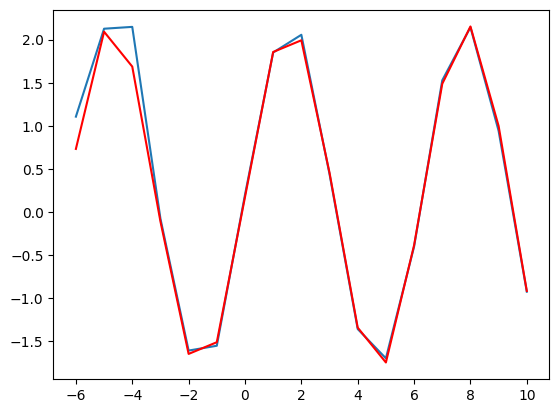

In [ ]:
plt.plot(x[4:],out)
plt.plot(x[4:], x_i[4:], color='red')
plt.show()

# Attention and Self Attention

In [ ]:
q = np.random.randn(4,8)
v = np.random.randn(4,8)
k = np.random.randn(4,8)

In [ ]:
corr = np.dot(q, k.T)/np.sqrt(len(q[0]))
# divided by sqrt(len(q[0])) to decrease variance

In [ ]:
mask = np.tril(np.ones((len(q), len(q))))
mask[mask==0] = -np.inf
mask[mask==1] = 0

In [ ]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

In [ ]:
attention = mask + corr
for i in range(len(attention)):
  attention[i] = softmax(attention[i])

In [ ]:
np.dot(attention, v)

array([[ 0.36169081, -1.32901637,  1.70253654,  1.02763472,  0.24964439,
        -0.21547164,  0.61643642, -0.28266181],
       [ 0.03146642, -1.06241476,  0.66338965,  0.12336941, -0.0685482 ,
         0.16757038,  0.45961645,  0.09360877],
       [-0.63847201, -0.56130883, -0.84496736, -1.06336314,  0.00763455,
         0.6609447 ,  0.15020911,  0.92217749],
       [-0.66368023, -0.69776048,  0.78553992, -0.47776101,  0.59581304,
         0.30796312, -0.22856682,  0.29099035]])

In [ ]:
v

array([[ 0.36169081, -1.32901637,  1.70253654,  1.02763472,  0.24964439,
        -0.21547164,  0.61643642, -0.28266181],
       [-0.72436537, -0.45220554, -1.71505447, -1.94635195, -0.79684109,
         1.04429343,  0.10068015,  0.95483306],
       [-0.92156959, -0.4544422 ,  0.09996873,  0.14407217,  1.94377206,
         0.1209581 ,  0.04251677,  1.44435044],
       [-1.30992154, -0.54465227,  2.74631655, -0.7815809 ,  1.32695741,
         0.18737282, -1.41322054, -0.55933106]])